<a href="https://colab.research.google.com/github/Clever-Lazinezz/NoteBook/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1: Identify the Problem

There are three distinct classes which have the same data collected from them. Using various techniques, I want to create a model that will precisely predict the class given the data collected.

## Task 2: Load the Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import plotly

"""
import cufflinks as cf # need to buy license for online use
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

cf.go_offline() #allows for non-profit use of cufflinks



from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
"""

"\nimport cufflinks as cf # need to buy license for online use\nplt.style.use('ggplot')\nplt.rcParams['figure.figsize'] = (12,8)\n\ncf.go_offline() #allows for non-profit use of cufflinks\n\n\n\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.model_selection import train_test_split\n"

## Task 3: Load the Data

In [ ]:
# https://www.sciencedirect.com/topics/mathematics/length-sepal

In [ ]:
# will read damn near any type of file
data = pd.read_csv('https://raw.githubusercontent.com/Clever-Lazinezz/ML-Data2/main/iris.csv')

## Task 4: EDA(Exploratory Data Analysis)

In [ ]:
data.head()

In [ ]:
# Thank you for no null values
data.info()

In [ ]:
data.describe()

In [ ]:
data.columns

In [27]:
# I don't like altering the original dataset - allows me to recall the original data at any time
train = data

In [30]:
# Is having zero okay?
# It was fine in other logistic models, but those only had a true(1) and a false(0)
train['Class'] = train['Class'].replace(['Setosa'],'0')
train['Class'] = train['Class'].replace(['Versicolor'],'1')
train['Class'] = train['Class'].replace(['Virginica'],'2')

## Task 5: Data Visualization

In [ ]:
# Visualizes the most common petal widths, and shows possible needs for scaling
sns.countplot(x='Petal_Width', data=data)

In [ ]:
# X-axis is the index and Y-axis is the length in centimeters
# Shows growth patterns for each column 
sns.set_theme(style="whitegrid")
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [ ]:
# Provides a general overview of how the data of each Class type compares to each other.
# Helps see which data column has the largest correlation with a given class
sns.pairplot(data, hue='Class', palette='magma')

# Task 6,7,8,9,10

# Linear Regression on the Data

## First Data Split

In [175]:
from sklearn.model_selection import train_test_split

In [226]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Class', axis=1), data['Class'], test_size = 0.33)

In [177]:
from sklearn.linear_model import LogisticRegression

In [227]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [228]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Predicitions based on entire dataset
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

## Second Data Split

In [ ]:
train.info()

In [182]:
# iloc creates data split
# predictions made using only sepal data
X = train.drop('Class', axis=1)
X = train.iloc[:, [0, 1]].values
y = train.iloc[:, -1].values


In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [184]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [ ]:
"""
Predictions were made using only sepal data, leading to a decrease in precision.
Primarily Class '1' & '2' were affected, implying that petal data may have a 
higher correlation to predicting the class.
"""
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

## Third Data Split

In [187]:
# predictions made using only pedal data
X = train.drop('Class', axis=1)
X = train.iloc[:, [2, 4]].values
y = train.iloc[:, -1].values

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [189]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [ ]:
"""
This model uses only pedal data. Either pedal data is extremely accurate for 
predicting class type or an error was made. Given the scientific background of the 
data, it is reasonable to believe that experimental groups were created to be 
diffrentiable. Thus having distinct species, that may have distinct features. 
Further analysis is required.
"""
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

# KNN Analysis on the Data

KNeighborsClassifier implements classification based on voting by nearest k-neighbors of target point(k)

## First Data Split

In [164]:
df1 = data

In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
scaler = StandardScaler()

In [167]:
scaler.fit(df1.drop('Class', axis=1))
scaled_features = scaler.transform(df1.drop('Class', axis=1))
df_feat = pd.DataFrame(scaled_features, columns = df1.columns[:-1])

In [ ]:
df_feat.head()

In [169]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df1['Class'], test_size = 0.25, random_state = 0)

In [170]:
from sklearn.neighbors import KNeighborsClassifier

In [171]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

### Scaled Data Results

Scaling is used when the data is 'all over the place'; however, this data was recorded very well. This makes sense this was a professional scientific experiment.

Since the first report had its test values look at only 1 neighboring value, they were less likely to be adjusted. This ended up in a higher precision score than the second report. Remember, precision is a measurment of how close data is to each other, or some other target point(ex. line of best fit). This is different from accuracy in sciences.

In [ ]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test, pred))

In [173]:

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test, pred))

## Second Data Split

In [217]:
X = df1.drop('Class', axis=1)
X = df1.iloc[:, [0, 1]].values
y = df1.iloc[:, -1].values


In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [219]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [ ]:
# This model was fed only half the total data. It's notable that 
# the precision of Class '2', is the most affected. It's reasonable 
# to theorize that data for Class '2' could be more of a cluster for 
# the selected columns of data used to test the model.
print(classification_report(y_test,pred))

In [ ]:
df1.head()

Class '0' has a larger sepal width growth than sepal length... The cluster for Class '1' and ESPECIALLY Class '2' is larger in the first model below; this corresponds with my hypothesis that "that data for Class '2' could be more of a cluster for the selected columns of data used to test the model

In [ ]:
sns.lmplot(data=df1,x='Sepal_Length', y='Sepal_Width', hue='Class')

It would be reasonable to hypothesis a high precision given the cluster of Classes '0' and '1' are relatively tightly spaced. However, Class '2' would run into similar issues.

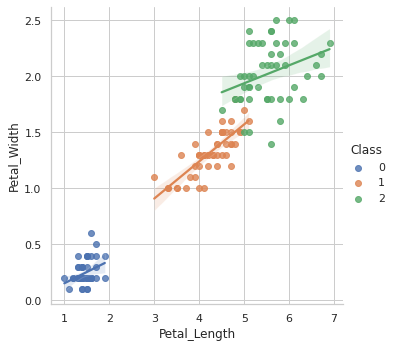

In [225]:
sns.lmplot(data=df1,x='Petal_Length', y='Petal_Width', hue='Class')

# SVM Model of Data

In [235]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [232]:
from sklearn.svm import SVC

In [233]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [234]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [236]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.00 %
Standard Deviation: 4.00 %
